### Day15 - Logistic Regression - Titanic Dataset
Oct 25, 2019

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import pandas_profiling

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [2]:
titanic = pd.read_csv(r'kaggle titanic/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

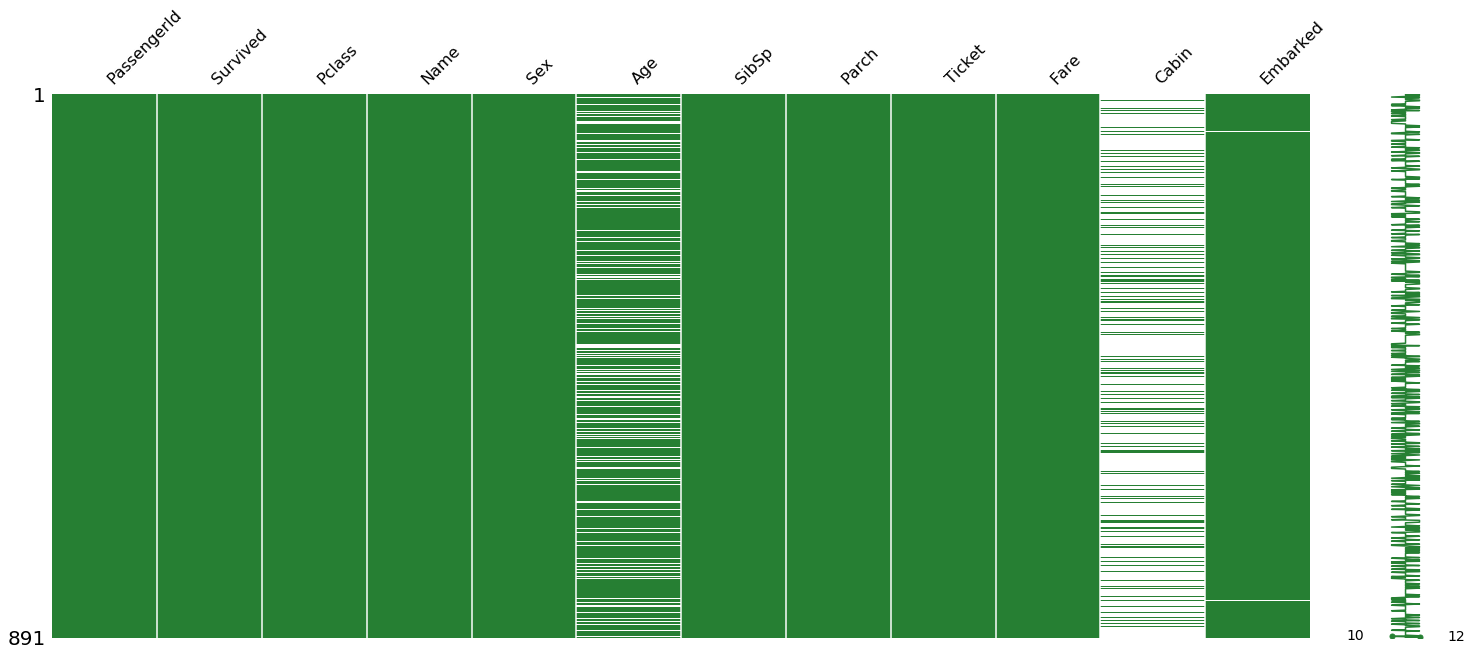

In [7]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

In [8]:
pandas_profiling.ProfileReport(titanic)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


#### SEX (Male/Female)

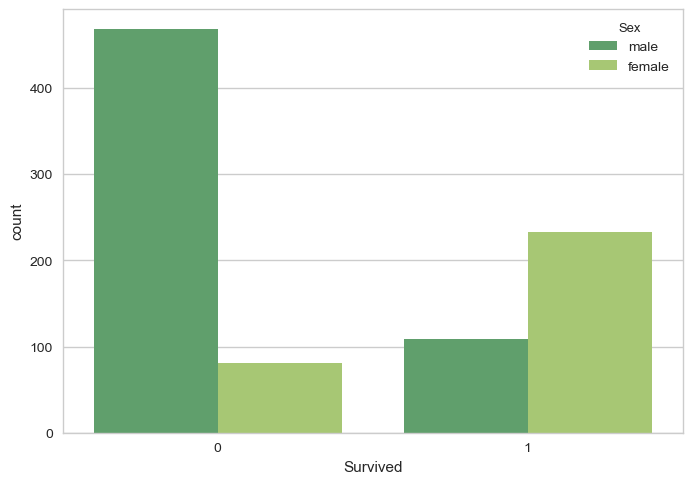

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Sex', palette='summer')

Text(0,0.5,'Survived')

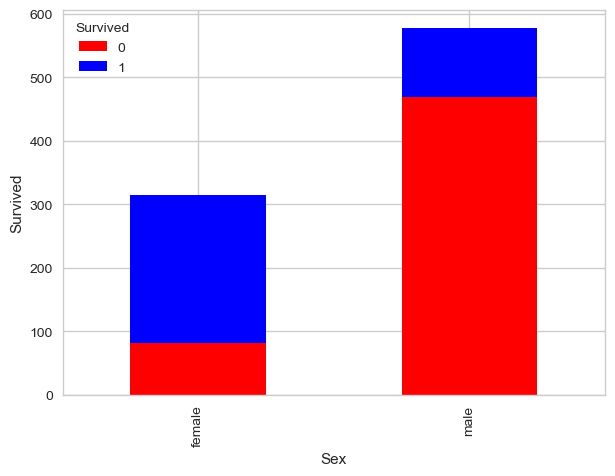

In [10]:
temp = pd.crosstab(titanic.Sex, titanic.Survived)
temp.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(7,5)).set_ylabel('Survived')
#plt.set_ylabel('Survived')

#### PClass (Passenger Class)

In [11]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

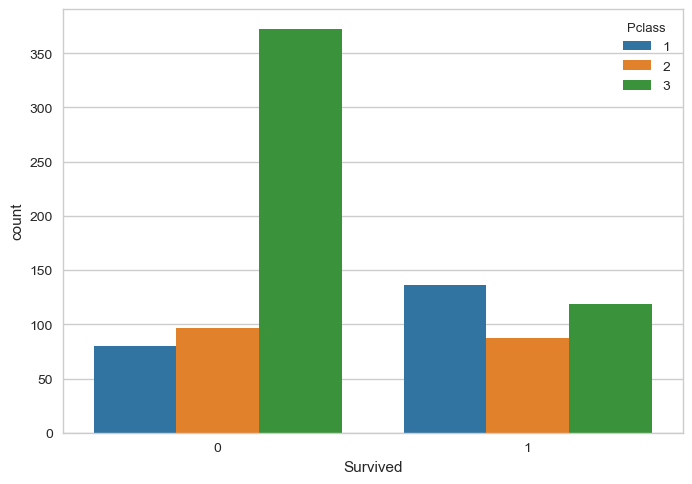

In [12]:
sns.countplot(x='Survived', data=titanic, hue='Pclass')

Text(0,0.5,'Survived')

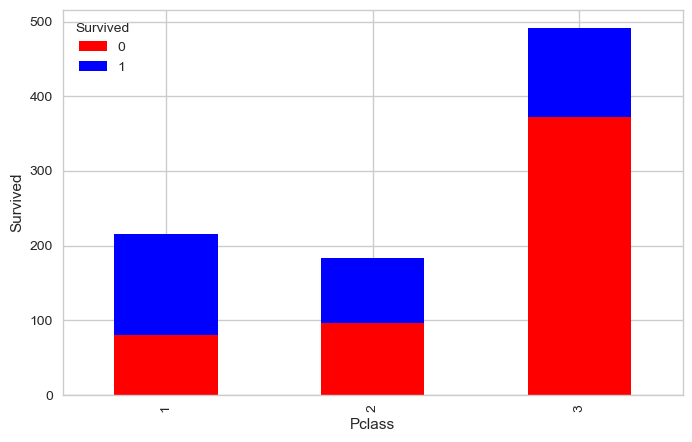

In [13]:
temp2 = pd.crosstab(titanic.Pclass,titanic.Survived)
temp2.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(8,5)).set_ylabel('Survived')

#### Age - Passenger Age

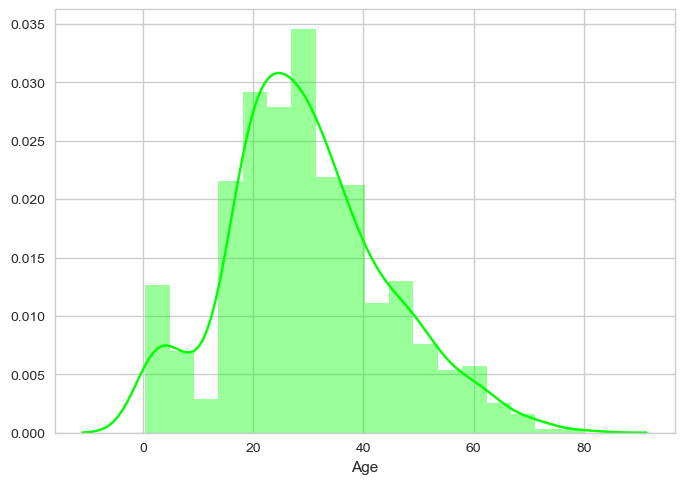

In [14]:
sns.set_style('whitegrid')
sns.distplot(titanic.Age.dropna(), bins=18, color='lime')

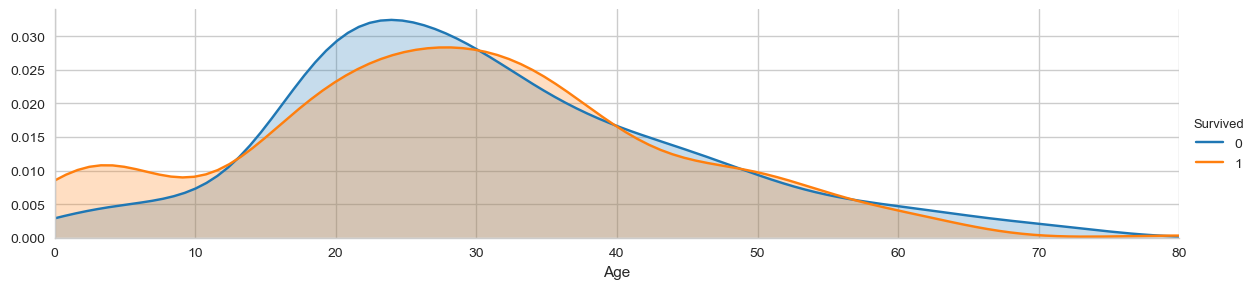

In [15]:
facet = sns.FacetGrid(data=titanic, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

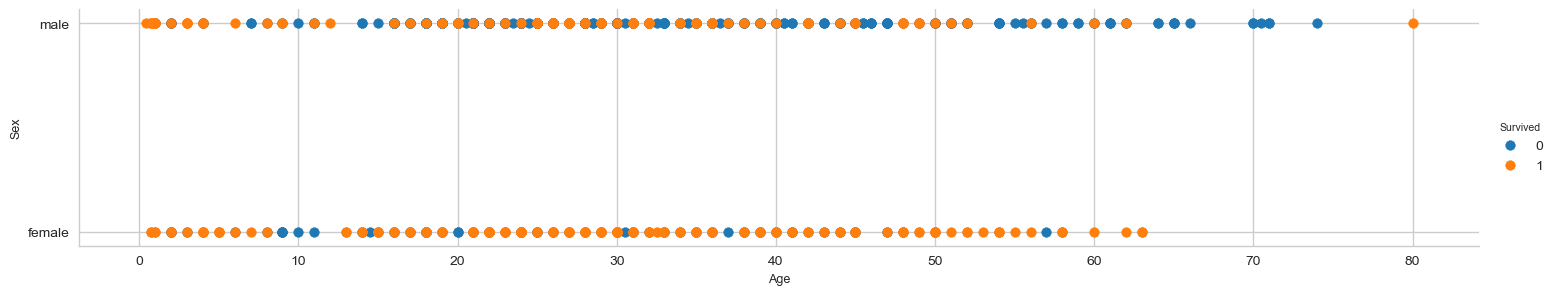

In [16]:
#facet = sns.FacetGrid(data=titanic, hue='Survived', aspect=4)
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('whitegrid')
sns.FacetGrid(titanic, hue='Survived', aspect=5)\
.map(plt.scatter, 'Age', 'Sex')\
.add_legend()

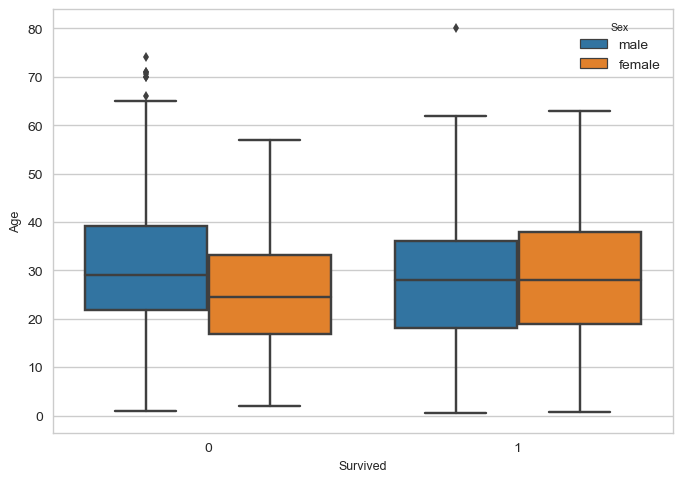

In [17]:
sns.boxplot(x='Survived',y='Age', data=titanic, hue='Sex')

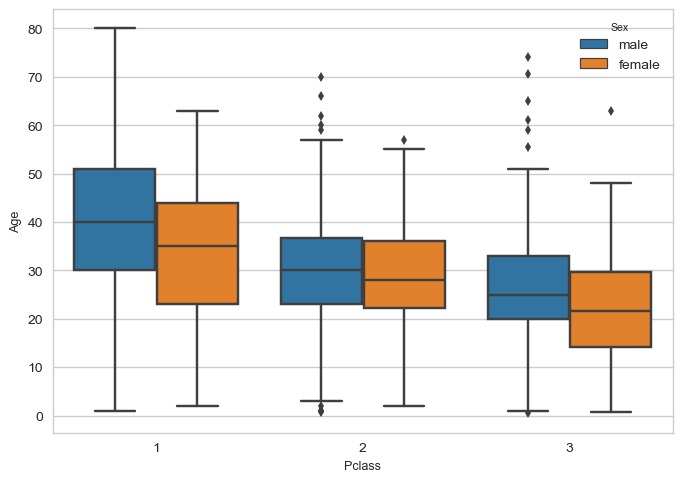

In [18]:
sns.boxplot(x='Pclass',y='Age', data=titanic, hue='Sex')

#### Embarked
Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [19]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

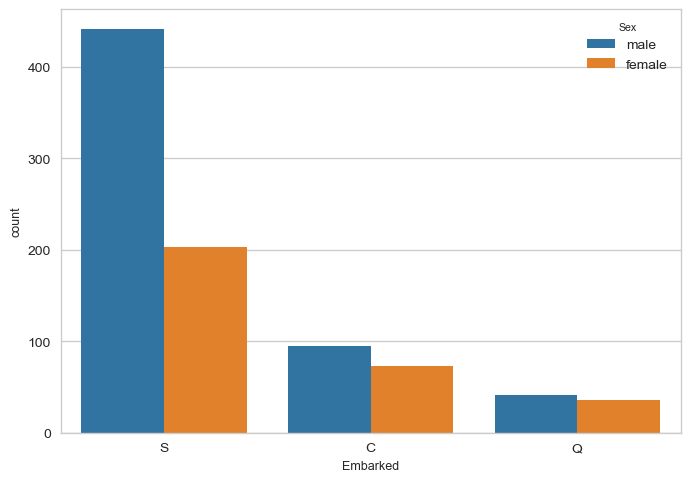

In [20]:
sns.countplot('Embarked', data=titanic, hue='Sex')

Text(0,0.5,'Survived')

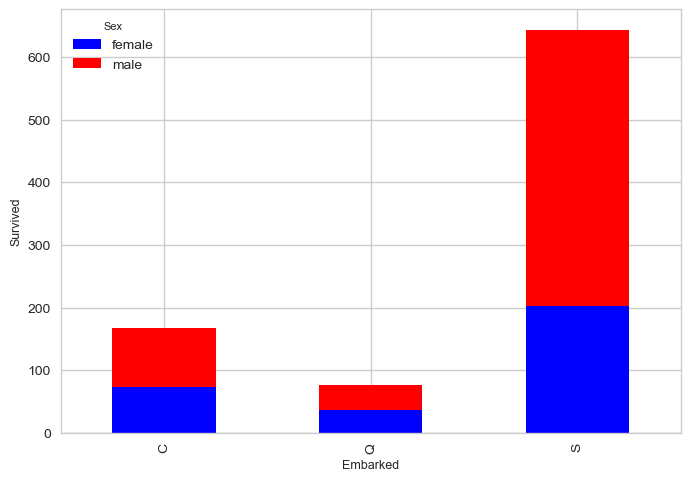

In [21]:
temp2 = pd.crosstab(titanic.Embarked, titanic.Sex)
temp2.plot(kind='bar',stacked=True, color=['blue', 'red']).set_ylabel('Survived')

Text(0,0.5,'Survived')

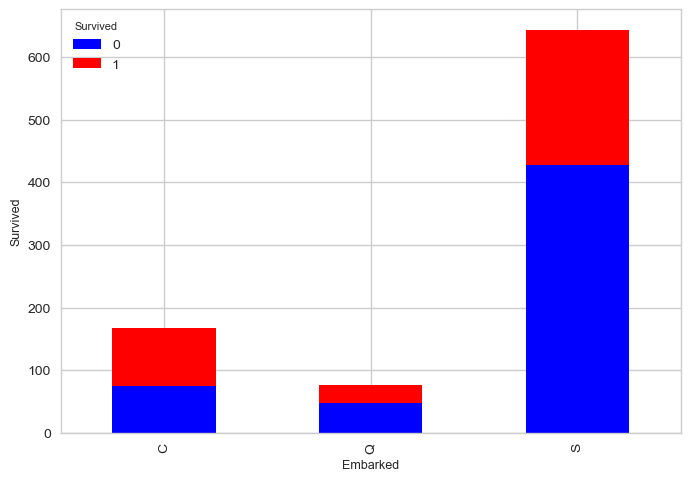

In [22]:
temp3 = pd.crosstab(titanic.Embarked, titanic.Survived)
temp3.plot(kind='bar', stacked=True, color=['blue', 'red']).set_ylabel('Survived')

#### SibSp (Sibling/Spouse)
Number of Siblings/Spouses Aboard

In [23]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

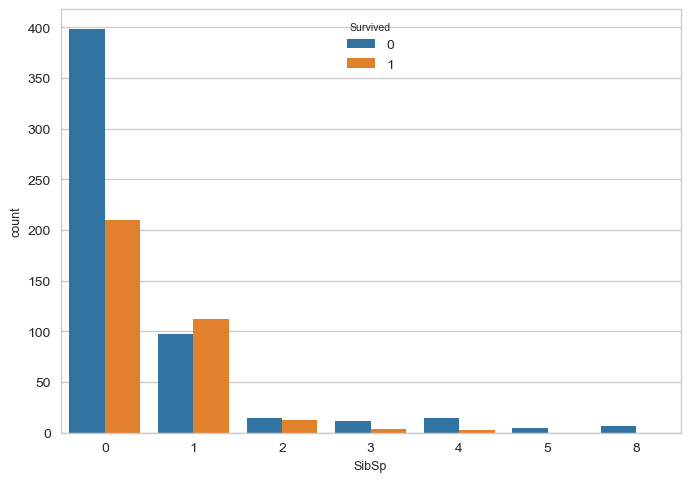

In [24]:
sns.countplot(x='SibSp', data=titanic, hue='Survived')

#### Parch (Passenger with Parents/children)
Number of Parents/Children Aboard

In [25]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

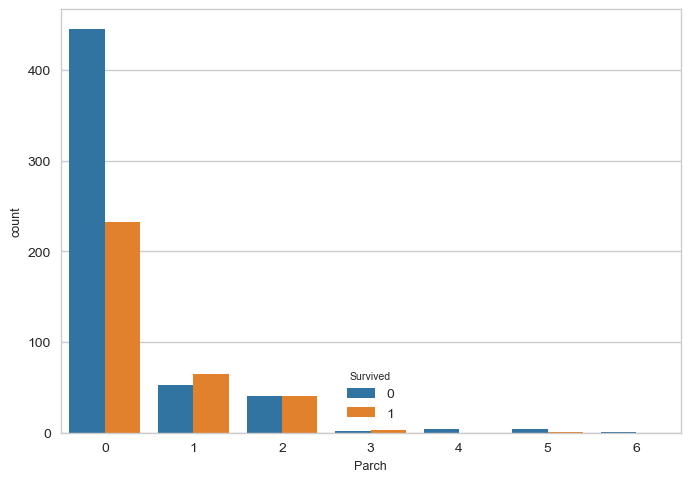

In [26]:
sns.countplot(x='Parch', data=titanic, hue='Survived')

#### Cleaning the Data
1. Dropping the Cabin column because too much missing data
2. Do imputation on the age column
3. Convert categorical data to numerical representation

In [28]:
#dropping the Cabin column
titanic.drop('Cabin', axis = 1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##### Imputation

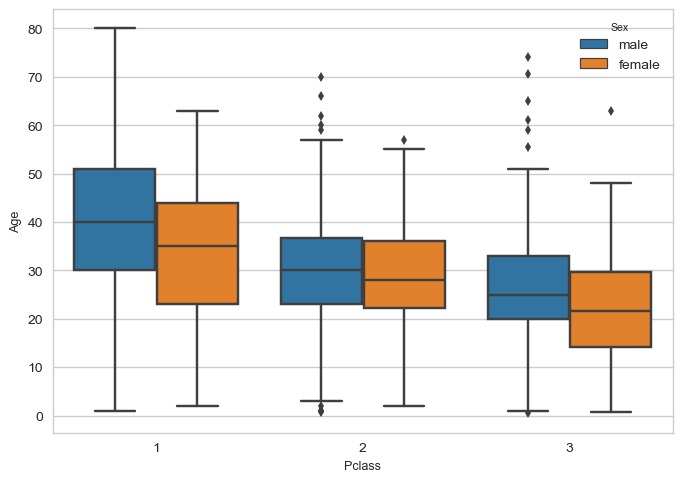

In [29]:
sns.boxplot(x='Pclass',y='Age', data=titanic, hue='Sex')

In [30]:
pclass1 = titanic[titanic['Pclass'] == 1]
pclass2 = titanic[titanic['Pclass'] == 2]
pclass3 = titanic[titanic['Pclass'] == 3]

print('Pclass1_Male average age:', pclass1[pclass1['Sex'] == 'male']['Age'].mean())
print('Pclass1_Female average age:',pclass1[pclass1['Sex'] == 'female']['Age'].mean())

print('Pclass2_Male average age:', pclass2[pclass2['Sex'] == 'male']['Age'].mean())
print('Pclass2_Female average age:',pclass2[pclass2['Sex'] == 'female']['Age'].mean())

print('Pclass3_Male average age:', pclass3[pclass3['Sex'] == 'male']['Age'].mean())
print('Pclass3_Female average age:',pclass3[pclass3['Sex'] == 'female']['Age'].mean())

Pclass1_Male average age: 41.28138613861386
Pclass1_Female average age: 34.61176470588235
Pclass2_Male average age: 30.74070707070707
Pclass2_Female average age: 28.722972972972972
Pclass3_Male average age: 26.507588932806325
Pclass3_Female average age: 21.75


In [31]:
#perform imputation on the age column
#use the average age per class by sex

def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        if Sex == 'male':
            if Pclass == 1:
                return 41
            elif Pclass == 2:
                return 30
            else:
                return 26
        else:
            if Pclass == 1:
                return 34
            elif Pclass == 2:
                return 28
            else:
                return 21
    else:
        return Age


In [32]:
titanic['Age'] = titanic[['Age', 'Pclass', 'Sex']].apply(imputeAge, axis=1 )

#check if there are still null values
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


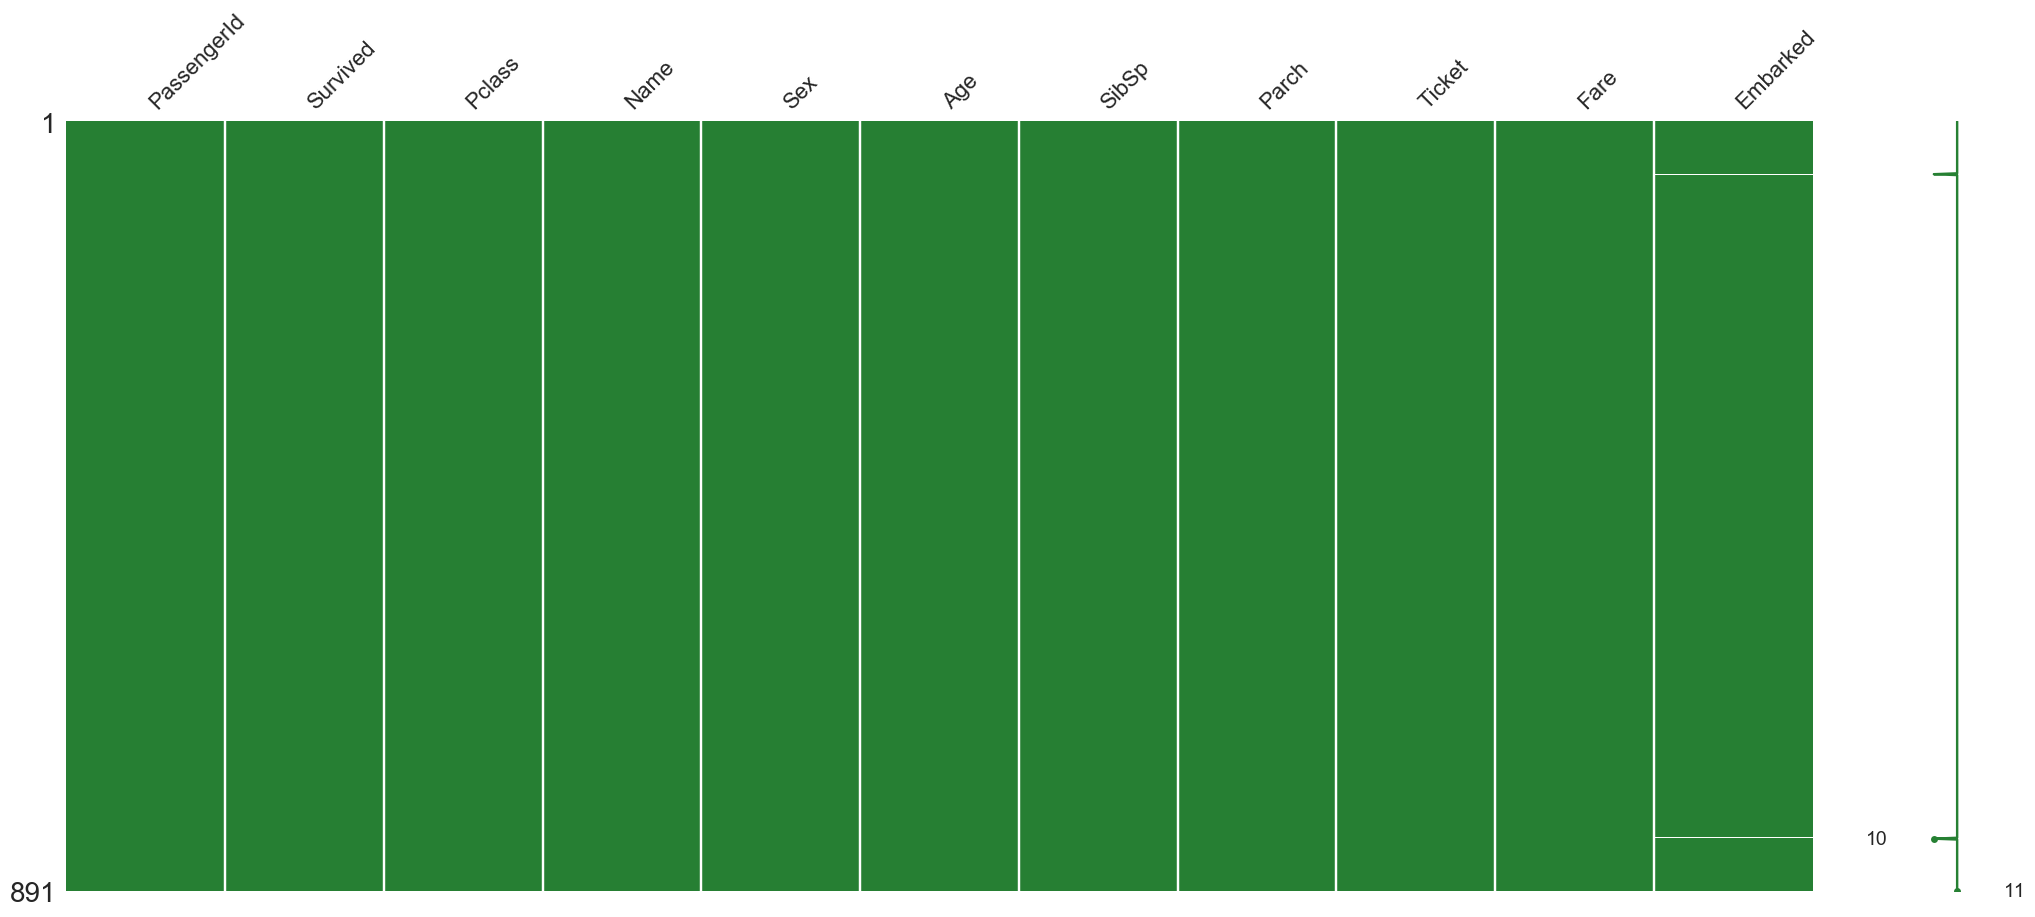

In [33]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

In [34]:
titanic.dropna(inplace = True)

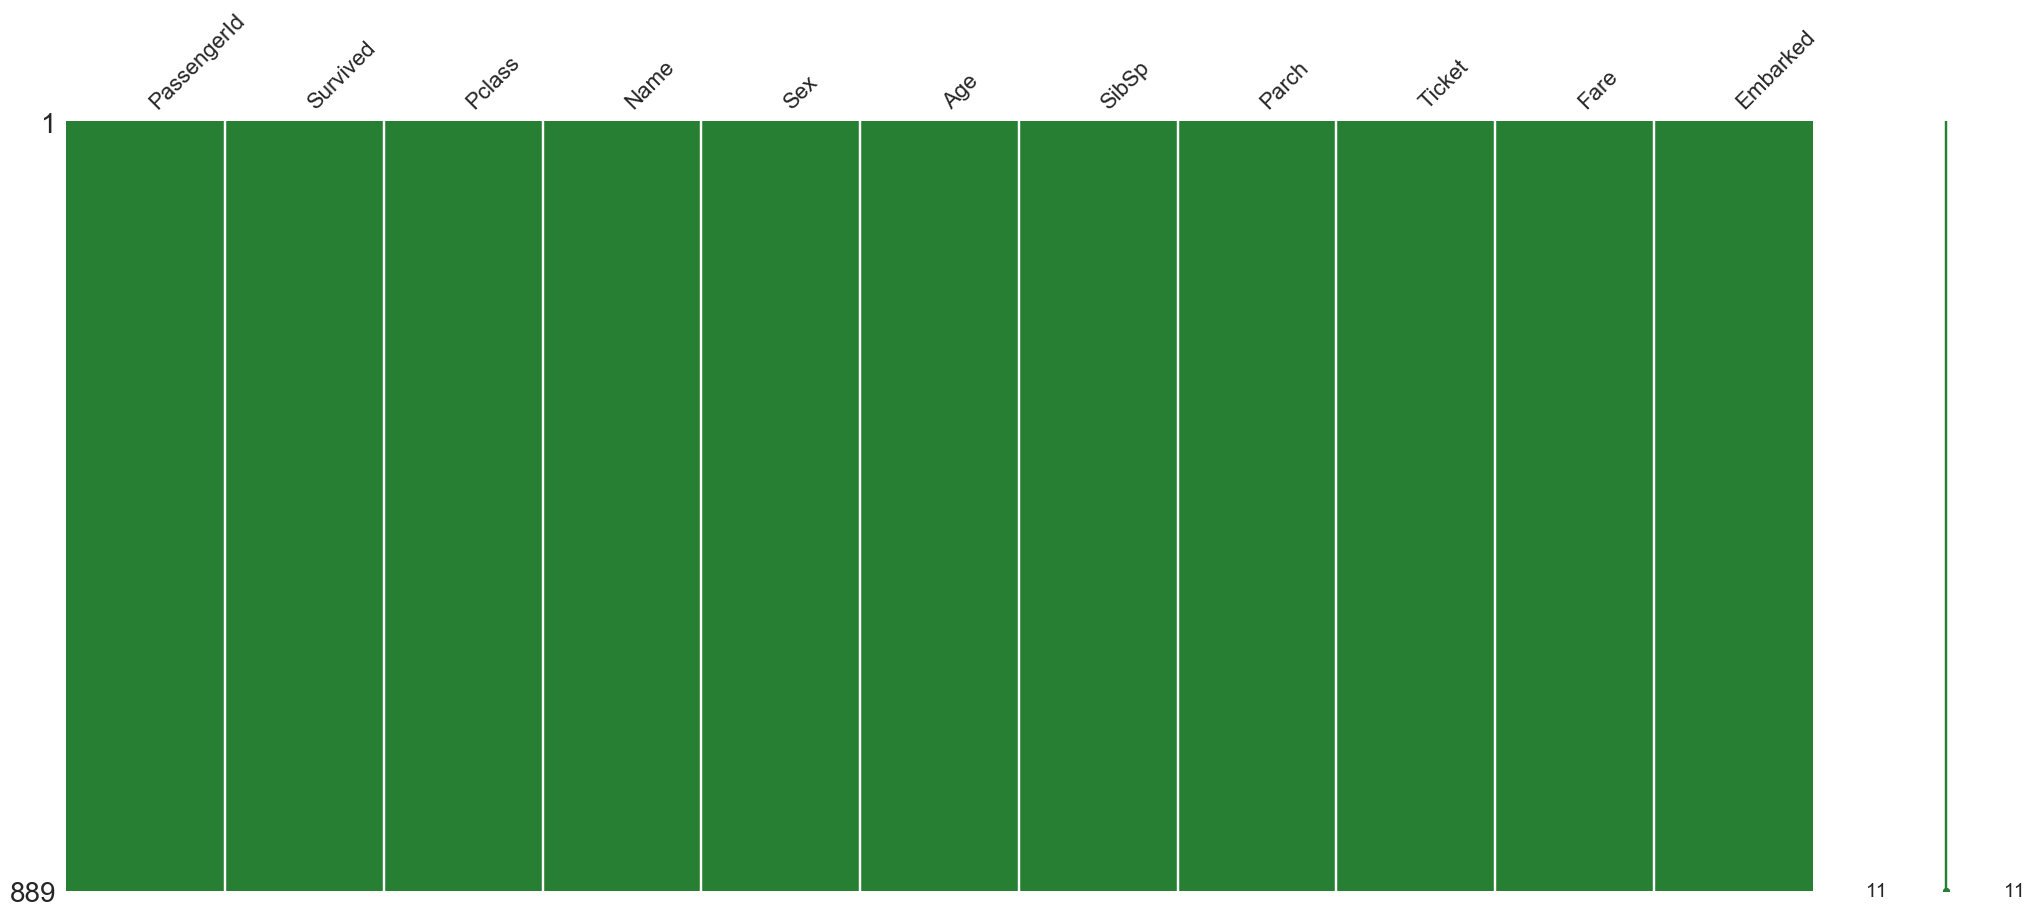

In [35]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

##### Label Encoding

In [36]:
#use LabelEncoder for the categorigal values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])
   
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


### Creating the Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#drop columns that will not be used
titanic.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [38]:
X = titanic.drop('Survived', axis=1)
y = titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (622, 7)
y_train: (622,)
X_test: (267, 7)
y_test: (267,)


In [40]:
logReg = LogisticRegression()

In [41]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
prediction = logReg.predict(X_test)

### Getting the Metrics

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [44]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       167
          1       0.75      0.69      0.72       100

avg / total       0.80      0.80      0.80       267



In [46]:
print(confusion_matrix(y_test, prediction))

[[144  23]
 [ 31  69]]


In [48]:
print(accuracy_score(y_test, prediction))

0.797752808988764
